# 3D Conv Speaker Recognition

Model proto phase of this implementation.

## Import Dependencies

In [2]:
import numpy as np

# Library for hdf5
import h5py as h5

# Vis Tool of IPythin
from IPython.display import SVG
from IPython.display import Audio


# Useful Magics
% reload_ext autoreload
% autoreload 2

In [2]:
# Model API Related
from keras.models import Model
from keras.optimizers import Adam

# Layers
from keras.layers import Input,Conv3D,Dense,PReLU,MaxPool3D,Activation

# vis tool
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


## Data preprocess


In [6]:
# TODO, CODE for h5 files

## Define Model

In [3]:
# Define Model
def model(input_shape):
    inputs=Input(shape=input_shape,name="input-layer")
    
    # Conv 1
    X = Conv3D(filters=16, kernel_size=(3, 1, 5), strides=(1, 1, 1), name="conv1-1")(inputs)
    X = PReLU(name="activation1-1")(X)
    X = Conv3D(filters=16, kernel_size=(3, 9, 1),strides=(1, 2, 1),name="conv1-2")(X)
    X = PReLU(name="activation1-2")(X)
    X = MaxPool3D(pool_size=(1, 1, 2), strides=(1, 1, 2), padding="valid", name="pool-1")(X)
    
    # Conv 2
    X = Conv3D(filters=16, kernel_size=(3, 1, 4), strides=(1, 1, 1), name="conv2-1")(X)
    X = PReLU(name="activation2-1")(X)
    X = Conv3D(filters=16, kernel_size=(3, 8, 1),strides=(1, 2, 1),name="conv2-2")(X)
    X = PReLU(name="activation2-2")(X)
    X = MaxPool3D(pool_size=(1, 1, 2), strides=(1, 1, 2), padding="valid", name="pool-2")(X)
    
    # Conv 3
    X = Conv3D(filters=16, kernel_size=(3, 1, 3), strides=(1, 1, 1), name="conv3-1")(X)
    X = PReLU(name="activation3-1")(X)
    X = Conv3D(filters=16, kernel_size=(3, 7, 1),strides=(1, 1, 1),name="conv3-2")(X)
    X = PReLU(name="activation3-2")(X)
    
    # Conv 4
    X = Conv3D(filters=16, kernel_size=(3, 1, 3), strides=(1, 1, 1), name="conv4-1")(X)
    X = PReLU(name="activation4-1")(X)
    X = Conv3D(filters=16, kernel_size=(3, 7, 1),strides=(1, 1, 1),name="conv4-2")(X)
    X = PReLU(name="activation4-2")(X)
    
    # FC
    X = Dense(units=128,name="fc")(X)
    # Final Activation
    X = Activation(activation="softmax",name="softmax")(X)
    model = Model(inputs=inputs,outputs=X)
    
    return model

In [4]:
model = model((108,80,40,1))
opt = Adam(beta_1=0.9, beta_2=0.999, decay=0.01, lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])

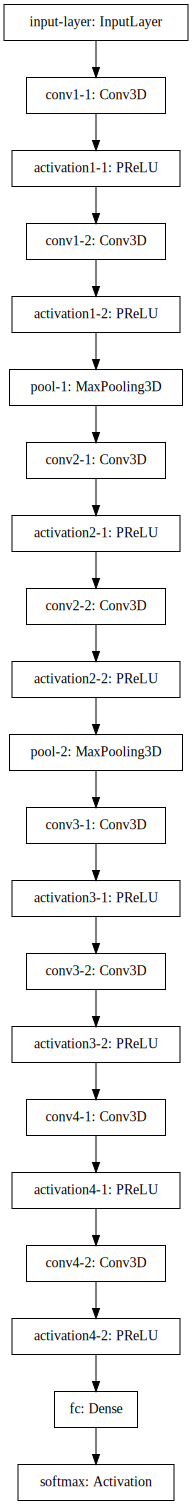

In [6]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Training


In [ ]:
# TODO, training code

# Enrollment

In [7]:
# Todo, enrollment and similarity comparison

# Evaluation

In [ ]:
# Evalution the model